In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve


In [56]:
df = pd.read_csv("Fosas comunes.csv")

In [57]:
df.head()

,ID,Estado_origen,Municipio_origen,Panteón_origen,Estatus_FC,Fecha_inhumación,Día_inhumación,Mes_inhumación,Año_inhumación,Fecha_defunción,...,Edad,Conocido_Desconocido,Primer apellido,Segundo Apellido,Nombre(s),Nombre completo,Institución_origen,Rdoc,Marca_temporal,Datos alternativos
0,XX-P001,Ciudad de México,Miguel Hidalgo,Panteón Civil de Dolores,Inhumación,30/01/2019,30,1,2019,04/03/2018,...,55.0,Desconocido,NaN,NaN,NaN,,UNIVERSIDAD WESTHILL - FACULTAD DE MEDICINA,Sí,23/03/2020,NaN
1,XX-P002,Ciudad de México,Miguel Hidalgo,Panteón Civil de Dolores,Inhumación,26/01/2019,26,1,2019,12/12/2018,...,NaN,Desconocido,NaN,NaN,NaN,,INSTITUTO DE CIENCIAS FORENSES - TRIBUNAL SUPE...,Sí,23/03/2020,NaN
2,XX-P003,Ciudad de México,Miguel Hidalgo,Panteón Civil de Dolores,Inhumación,26/01/2019,26,1,2019,13/12/2018,...,NaN,Conocido,Cruz,Lucero,Alberto,Alberto Cruz Lucero,INSTITUTO DE CIENCIAS FORENSES - TRIBUNAL SUPE...,Sí,23/03/2020,NaN
3,XX-P004,Ciudad de México,Miguel Hidalgo,Panteón Civil de Dolores,Inhumación,26/01/2019,26,1,2019,14/12/2018,...,NaN,Desconocido,NaN,NaN,NaN,,INSTITUTO DE CIENCIAS FORENSES - TRIBUNAL SUPE...,Sí,23/03/2020,NaN
4,XX-P005,Ciudad de México,Miguel Hidalgo,Panteón Civil de Dolores,Inhumación,26/01/2019,26,1,2019,18/12/2018,...,NaN,Desconocido,NaN,NaN,NaN,,INSTITUTO DE CIENCIAS FORENSES - TRIBUNAL SUPE...,Sí,23/03/2020,NaN


In [58]:
#Reemplazamos los datos faltantes de la variable Edad
df['Edad'] = df['Edad'].replace(',np.nan')
median_Edad = df['Edad'].median(skipna=True)

In [59]:
df['Edad'] = df['Edad'].replace(np.nan, median_Edad).astype(float)
df['Edad']

0        55.0
1        47.0
2        47.0
3        47.0
4        47.0
         ... 
21014    47.0
21015    47.0
21016    53.0
21017    45.0
21018    42.0
Name: Edad, Length: 21019, dtype: float64

In [60]:
#Identificar datos faltantes
df.dtypes

ID                       object
Estado_origen            object
Municipio_origen         object
Panteón_origen           object
Estatus_FC               object
Fecha_inhumación         object
Día_inhumación           object
Mes_inhumación           object
Año_inhumación           object
Fecha_defunción          object
Día_defunción            object
Mes_defunción            object
Año_defunción            object
Fecha_exhumación         object
Restos_tipo              object
Sexo                     object
Edad                    float64
Conocido_Desconocido     object
Primer apellido          object
Segundo Apellido         object
Nombre(s)                object
Nombre completo          object
Institución_origen       object
Rdoc                     object
Marca_temporal           object
Datos alternativos      float64
dtype: object

In [61]:
df['Municipio_origen'].unique()

array(['Miguel Hidalgo', 'Xalapa', 'Hermosillo', 'Heroica Guaymas',
       'Puebla de Zaragoza', 'Teziutlán', 'Veracruz', 'Minatitlán',
       'Guadalajara', 'Puerto Vallarta', 'Huitzuco de los Figueroa',
       'San Cristóbal de las Casas'], dtype=object)

In [62]:
df['Panteón_origen'].unique()

array(['Panteón Civil de Dolores', 'Panteón Parque Memorial',
       'Panteón Norte', 'Panteón Sahuaro', 'Panteón Yañez',
       'Panteón Héroes Civiles de Guaymas', 'Panteón Municipal de Puebla',
       'Panteon Municipal de Teziutlán',
       'Panteón del Barrio de Chignaulingo',
       'Panteón del Barrio de Fresnillo', 'Panteón Palo Verde',
       'Panteón Municipal de Veracruz', 'Panteón Xalapeño',
       'Panteón Municipal Hidalgo', 'Panteón Municipal Bosques de Xalapa',
       'Panteón Mezquitán', 'Panteón Nuevo Guadalajara',
       'Cementerio El Progreso', 'Panteón Municipal de Huitzuco',
       'Panteón Municipal'], dtype=object)

In [63]:
df['Restos_tipo'].unique()

array(['Restos cremados', 'Cadáver', 'Feto', 'Miembros', 'Restos humanos',
       'Restos óseos', 'Sin dato'], dtype=object)

In [64]:
df['Edad'].unique()

array([55. , 47. ,  0. , 31. , 18. , 39. , 35. , 74. , 26. , 83. , 89. ,
       64. , 78. , 73. , 81. , 75. , 60. , 63. , 27. , 45. , 40. , 38. ,
       25. , 90. , 42. , 77. , 70. , 32. , 76. , 84. , 87. , 66. , 68. ,
       94. , 71. , 92. , 49. , 69. , 50. , 80. , 28. , 37. , 30. , 20. ,
       15. , 34. , 65. , 86. , 67. , 58. , 52. , 85. , 46. , 22. , 54. ,
       33. , 48. , 53. , 44. , 57. , 72. , 41. , 79. , 51. , 82. , 88. ,
       36. , 96. , 62. , 91. , 24. , 29. , 13. ,  6. , 98. , 93. , 59. ,
       19. , 61. , 97. , 95. , 17. , 16. , 23. , 21. , 56. , 11. ,  5. ,
        1. , 43. ,  9. ,  3. , 12. ,  2. ,  4. ,  8. , 18.8, 14. ,  7. ,
       10. ])

In [65]:
len(df.loc[(df['Restos_tipo'] == 'Sin dato')])

1039

In [66]:
(1039/len(df))*100

4.943146676816214

In [67]:
len(df)

21019

In [68]:
df_no_missing = df.loc[(df['Restos_tipo'] != 'Sin dato')]

In [69]:
len(df_no_missing)

19980

In [70]:
df_no_missing['Restos_tipo'].unique()

array(['Restos cremados', 'Cadáver', 'Feto', 'Miembros', 'Restos humanos',
       'Restos óseos'], dtype=object)

In [71]:
df_no_missing.columns

Index(['ID', 'Estado_origen', 'Municipio_origen', 'Panteón_origen',
       'Estatus_FC', 'Fecha_inhumación', 'Día_inhumación', 'Mes_inhumación',
       'Año_inhumación', 'Fecha_defunción', 'Día_defunción', 'Mes_defunción',
       'Año_defunción', 'Fecha_exhumación', 'Restos_tipo', 'Sexo', 'Edad',
       'Conocido_Desconocido', 'Primer apellido', 'Segundo Apellido',
       'Nombre(s)', 'Nombre completo', 'Institución_origen', 'Rdoc',
       'Marca_temporal', 'Datos alternativos'],
      dtype='object')

In [72]:
X = df_no_missing.iloc[:,[2,3,14,16]]
X.head()

,Municipio_origen,Panteón_origen,Restos_tipo,Edad
0,Miguel Hidalgo,Panteón Civil de Dolores,Restos cremados,55.0
1,Miguel Hidalgo,Panteón Civil de Dolores,Cadáver,47.0
2,Miguel Hidalgo,Panteón Civil de Dolores,Cadáver,47.0
3,Miguel Hidalgo,Panteón Civil de Dolores,Cadáver,47.0
4,Miguel Hidalgo,Panteón Civil de Dolores,Cadáver,47.0


In [73]:
X['Municipio_origen'].unique()

array(['Miguel Hidalgo', 'Xalapa', 'Hermosillo', 'Heroica Guaymas',
       'Puebla de Zaragoza', 'Teziutlán', 'Veracruz', 'Minatitlán',
       'Guadalajara', 'Puerto Vallarta', 'San Cristóbal de las Casas'],
      dtype=object)

In [74]:
X['Panteón_origen'].unique()

array(['Panteón Civil de Dolores', 'Panteón Parque Memorial',
       'Panteón Norte', 'Panteón Sahuaro',
       'Panteón Héroes Civiles de Guaymas', 'Panteón Municipal de Puebla',
       'Panteon Municipal de Teziutlán', 'Panteón Palo Verde',
       'Panteón Municipal de Veracruz', 'Panteón Xalapeño',
       'Panteón Municipal Hidalgo', 'Panteón Municipal Bosques de Xalapa',
       'Panteón Mezquitán', 'Panteón Nuevo Guadalajara',
       'Cementerio El Progreso', 'Panteón Municipal'], dtype=object)

In [75]:
X['Restos_tipo'].unique()

array(['Restos cremados', 'Cadáver', 'Feto', 'Miembros', 'Restos humanos',
       'Restos óseos'], dtype=object)

In [76]:
X['Edad'].unique()

array([55. , 47. ,  0. , 31. , 18. , 39. , 35. , 74. , 26. , 83. , 89. ,
       64. , 78. , 73. , 81. , 75. , 60. , 63. , 27. , 45. , 40. , 38. ,
       25. , 90. , 42. , 77. , 70. , 32. , 76. , 84. , 87. , 66. , 68. ,
       94. , 71. , 92. , 49. , 69. , 50. , 80. , 28. , 37. , 30. , 20. ,
       15. , 34. , 65. , 86. , 67. , 58. , 52. , 85. , 46. , 22. , 54. ,
       33. , 48. , 53. , 44. , 57. , 72. , 41. , 79. , 51. , 82. , 88. ,
       36. , 96. , 62. , 91. , 24. , 29. , 13. ,  6. , 98. , 93. , 59. ,
       19. , 61. , 97. , 95. , 17. , 16. , 23. , 21. , 56. , 11. ,  5. ,
        1. , 43. ,  9. ,  3. , 12. ,  2. ,  4. ,  8. , 18.8, 14. ,  7. ,
       10. ])

In [77]:
y = df_no_missing['Conocido_Desconocido'].copy()
y.head()

0    Desconocido
1    Desconocido
2       Conocido
3    Desconocido
4    Desconocido
Name: Conocido_Desconocido, dtype: object

# One hot encoding

In [78]:
X.dtypes

Municipio_origen     object
Panteón_origen       object
Restos_tipo          object
Edad                float64
dtype: object

In [79]:
X_encoded = pd.get_dummies(X, columns=['Municipio_origen','Panteón_origen','Restos_tipo'])
X_encoded.head()

,Edad,Municipio_origen_Guadalajara,Municipio_origen_Hermosillo,Municipio_origen_Heroica Guaymas,Municipio_origen_Miguel Hidalgo,Municipio_origen_Minatitlán,Municipio_origen_Puebla de Zaragoza,Municipio_origen_Puerto Vallarta,Municipio_origen_San Cristóbal de las Casas,Municipio_origen_Teziutlán,...,Panteón_origen_Panteón Palo Verde,Panteón_origen_Panteón Parque Memorial,Panteón_origen_Panteón Sahuaro,Panteón_origen_Panteón Xalapeño,Restos_tipo_Cadáver,Restos_tipo_Feto,Restos_tipo_Miembros,Restos_tipo_Restos cremados,Restos_tipo_Restos humanos,Restos_tipo_Restos óseos
0,55.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
X_encoded.columns

Index(['Edad', 'Municipio_origen_Guadalajara', 'Municipio_origen_Hermosillo',
       'Municipio_origen_Heroica Guaymas', 'Municipio_origen_Miguel Hidalgo',
       'Municipio_origen_Minatitlán', 'Municipio_origen_Puebla de Zaragoza',
       'Municipio_origen_Puerto Vallarta',
       'Municipio_origen_San Cristóbal de las Casas',
       'Municipio_origen_Teziutlán', 'Municipio_origen_Veracruz',
       'Municipio_origen_Xalapa', 'Panteón_origen_Cementerio El Progreso',
       'Panteón_origen_Panteon Municipal de Teziutlán',
       'Panteón_origen_Panteón Civil de Dolores',
       'Panteón_origen_Panteón Héroes Civiles de Guaymas',
       'Panteón_origen_Panteón Mezquitán', 'Panteón_origen_Panteón Municipal',
       'Panteón_origen_Panteón Municipal Bosques de Xalapa',
       'Panteón_origen_Panteón Municipal Hidalgo',
       'Panteón_origen_Panteón Municipal de Puebla',
       'Panteón_origen_Panteón Municipal de Veracruz',
       'Panteón_origen_Panteón Norte',
       'Panteón_origen_Pan

In [81]:
len(X_encoded.loc[(X_encoded['Municipio_origen_Guadalajara'] == 'nan')])
#len(df.loc[(df['Restos_tipo'] == 'Sin dato')])

0

In [82]:
y.unique()

array(['Desconocido', 'Conocido'], dtype=object)

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [84]:
le.fit(df_no_missing['Conocido_Desconocido'])
column_Conocido_Desconocido = le.transform(df_no_missing['Conocido_Desconocido'])
df_no_missing['Conocido_Desconocido'] = column_Conocido_Desconocido

C:\Users\Lesli\AppData\Local\Temp\ipykernel_9068\3126090605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['Conocido_Desconocido'] = column_Conocido_Desconocido


In [85]:
#pd.get_dummies(y, columns=['Conocido_Desconocido']).head()

In [86]:
y

0        Desconocido
1        Desconocido
2           Conocido
3        Desconocido
4        Desconocido
            ...     
21014    Desconocido
21015    Desconocido
21016    Desconocido
21017    Desconocido
21018       Conocido
Name: Conocido_Desconocido, Length: 19980, dtype: object

In [87]:
y = df_no_missing['Conocido_Desconocido'].copy()
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Conocido_Desconocido, dtype: int32

In [88]:
df3 = pd.concat([X_encoded,y], axis=1)
df3

,Edad,Municipio_origen_Guadalajara,Municipio_origen_Hermosillo,Municipio_origen_Heroica Guaymas,Municipio_origen_Miguel Hidalgo,Municipio_origen_Minatitlán,Municipio_origen_Puebla de Zaragoza,Municipio_origen_Puerto Vallarta,Municipio_origen_San Cristóbal de las Casas,Municipio_origen_Teziutlán,...,Panteón_origen_Panteón Parque Memorial,Panteón_origen_Panteón Sahuaro,Panteón_origen_Panteón Xalapeño,Restos_tipo_Cadáver,Restos_tipo_Feto,Restos_tipo_Miembros,Restos_tipo_Restos cremados,Restos_tipo_Restos humanos,Restos_tipo_Restos óseos,Conocido_Desconocido
0,55.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21014,47.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
21015,47.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
21016,53.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
21017,45.0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [89]:
#ruta = "/Users/Lesli/Documents/Ciencia de datos/Proyecto final/DatosLimpios4Var.csv"
#df3.to_csv(ruta)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
#Crear un árbol de decisión y lo ajusta a los datos de entrenamiento
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

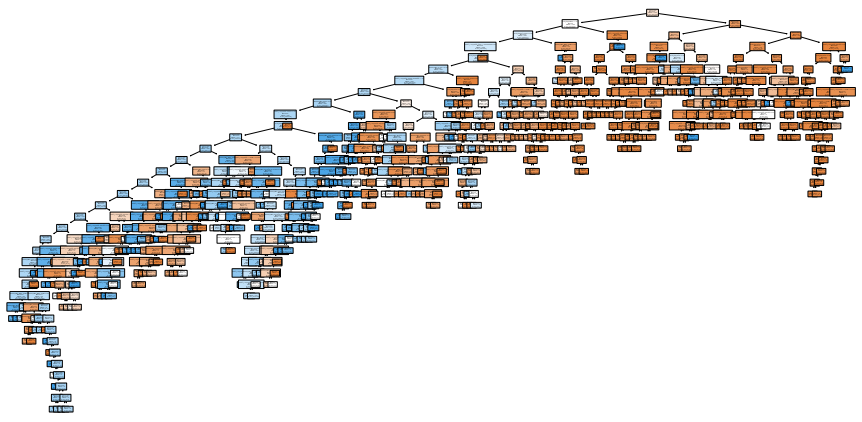

In [91]:
#Gráfica
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["Conocido", "Desconocido"],
         feature_names=X_encoded.columns);

In [92]:
#from sklearn.tree import export_text
X_encoded.columns

Index(['Edad', 'Municipio_origen_Guadalajara', 'Municipio_origen_Hermosillo',
       'Municipio_origen_Heroica Guaymas', 'Municipio_origen_Miguel Hidalgo',
       'Municipio_origen_Minatitlán', 'Municipio_origen_Puebla de Zaragoza',
       'Municipio_origen_Puerto Vallarta',
       'Municipio_origen_San Cristóbal de las Casas',
       'Municipio_origen_Teziutlán', 'Municipio_origen_Veracruz',
       'Municipio_origen_Xalapa', 'Panteón_origen_Cementerio El Progreso',
       'Panteón_origen_Panteon Municipal de Teziutlán',
       'Panteón_origen_Panteón Civil de Dolores',
       'Panteón_origen_Panteón Héroes Civiles de Guaymas',
       'Panteón_origen_Panteón Mezquitán', 'Panteón_origen_Panteón Municipal',
       'Panteón_origen_Panteón Municipal Bosques de Xalapa',
       'Panteón_origen_Panteón Municipal Hidalgo',
       'Panteón_origen_Panteón Municipal de Puebla',
       'Panteón_origen_Panteón Municipal de Veracruz',
       'Panteón_origen_Panteón Norte',
       'Panteón_origen_Pan

In [93]:
from sklearn.tree import export_text

In [94]:
 #r = export_text(Tree, feature_names=[iris['feature_names'][pair[0]],iris['feature_names'][pair[1]]])
# print(r)
r = export_text(clf_dt, feature_names=['Edad', 'Municipio_origen_Guadalajara', 'Municipio_origen_Hermosillo',
       'Municipio_origen_Heroica Guaymas', 'Municipio_origen_Miguel Hidalgo',
       'Municipio_origen_Minatitlán', 'Municipio_origen_Puebla de Zaragoza',
       'Municipio_origen_Puerto Vallarta',
       'Municipio_origen_San Cristóbal de las Casas',
       'Municipio_origen_Teziutlán', 'Municipio_origen_Veracruz',
       'Municipio_origen_Xalapa', 'Panteón_origen_Cementerio El Progreso',
       'Panteón_origen_Panteon Municipal de Teziutlán',
       'Panteón_origen_Panteón Civil de Dolores',
       'Panteón_origen_Panteón Héroes Civiles de Guaymas',
       'Panteón_origen_Panteón Mezquitán', 'Panteón_origen_Panteón Municipal',
       'Panteón_origen_Panteón Municipal Bosques de Xalapa',
       'Panteón_origen_Panteón Municipal Hidalgo',
       'Panteón_origen_Panteón Municipal de Puebla',
       'Panteón_origen_Panteón Municipal de Veracruz',
       'Panteón_origen_Panteón Norte',
       'Panteón_origen_Panteón Nuevo Guadalajara',
       'Panteón_origen_Panteón Palo Verde',
       'Panteón_origen_Panteón Parque Memorial',
       'Panteón_origen_Panteón Sahuaro', 'Panteón_origen_Panteón Xalapeño',
       'Restos_tipo_Cadáver', 'Restos_tipo_Feto', 'Restos_tipo_Miembros',
       'Restos_tipo_Restos cremados', 'Restos_tipo_Restos humanos',
       'Restos_tipo_Restos óseos'])
print(r)

|--- Edad <= 60.50
|   |--- Restos_tipo_Miembros <= 0.50
|   |   |--- Restos_tipo_Restos humanos <= 0.50
|   |   |   |--- Panteón_origen_Panteón Héroes Civiles de Guaymas <= 0.50
|   |   |   |   |--- Restos_tipo_Restos cremados <= 0.50
|   |   |   |   |   |--- Municipio_origen_Hermosillo <= 0.50
|   |   |   |   |   |   |--- Panteón_origen_Panteon Municipal de Teziutlán <= 0.50
|   |   |   |   |   |   |   |--- Edad <= 50.50
|   |   |   |   |   |   |   |   |--- Municipio_origen_Veracruz <= 0.50
|   |   |   |   |   |   |   |   |   |--- Panteón_origen_Panteón Xalapeño <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Restos_tipo_Restos óseos <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 25
|   |   |   |   |   |   |   |   |   |   |--- Restos_tipo_Restos óseos >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- Panteón_origen_Panteón Xalapeño >  0.50
|   |   |   |   |   |   |   

In [95]:
predic = clf_dt.predict(X_encoded)

# Métrica

In [96]:
pd.crosstab(y, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7889,3436,11325
1,1031,7624,8655
All,8920,11060,19980


In [97]:
print(classification_report(y, predic))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78     11325
           1       0.69      0.88      0.77      8655

    accuracy                           0.78     19980
   macro avg       0.79      0.79      0.78     19980
weighted avg       0.80      0.78      0.78     19980



In [98]:
accuracy_score(y, predic)

0.7764264264264265

In [99]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [100]:
roc_curve(y, predic, pos_label=None) #En clase se usó pos_label=2

(array([0.        , 0.30339956, 1.        ]),
 array([0.        , 0.88087811, 1.        ]),
 array([2, 1, 0]))

In [101]:
fpr, tpr, _ = roc_curve(y, predic, pos_label=None)

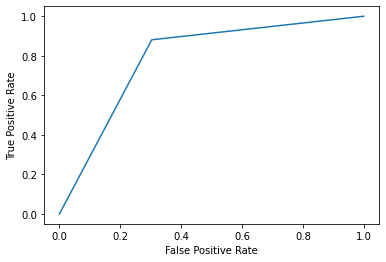

In [102]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [103]:
roc_auc_score(y, clf_dt.predict(X_encoded), multi_class='ovr')

0.7887392733213203

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RFC = RandomForestClassifier(max_depth=2)

In [106]:
RFC.fit(X_encoded,y)

RandomForestClassifier(max_depth=2)

In [107]:
predic = RFC.predict(X_encoded)

In [108]:
accuracy_score(y, predic)

0.5831331331331331

In [109]:
print(classification_report(y, predic))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73     11325
           1       0.87      0.04      0.08      8655

    accuracy                           0.58     19980
   macro avg       0.72      0.52      0.41     19980
weighted avg       0.70      0.58      0.45     19980



# Gradient BoostingClassifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1)

In [112]:
GBC.fit(X_encoded, y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [113]:
predic = GBC.predict(X_encoded)

In [114]:
accuracy_score(y, predic)

0.7336336336336337

In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve

C:\Users\Lesli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


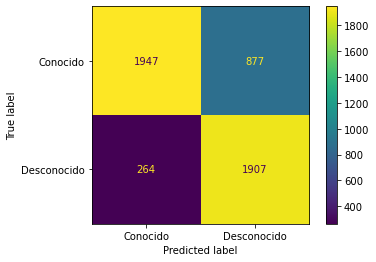

In [116]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Conocido", "Desconocido"])

In [117]:
predic = clf_dt.predict(X_test)

In [118]:
accuracy_score(y_test, predic)

0.7715715715715715

In [119]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1947,877,2824
1,264,1907,2171
All,2211,2784,4995


In [120]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      2824
           1       0.68      0.88      0.77      2171

    accuracy                           0.77      4995
   macro avg       0.78      0.78      0.77      4995
weighted avg       0.80      0.77      0.77      4995



In [121]:
predic = clf_dt.predict(X_train)

In [122]:
accuracy_score(y_train, predic)

0.7780447113780448

In [123]:
print(classification_report(y_train, predic))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      8501
           1       0.69      0.88      0.77      6484

    accuracy                           0.78     14985
   macro avg       0.79      0.79      0.78     14985
weighted avg       0.80      0.78      0.78     14985

